22H1120016 - Trần Đăng Nam

Chạy K-Mean như lab 4.1 - nhưng dùng Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Khởi tạo mô hình KMeans
- n_clusters: Số lượng cụm (k)
- init: Phương pháp khởi tạo tâm cụm ('k-means++' là mặc định và thường tốt hơn 'random')
- n_init: Số lần chạy thuật toán với các hạt giống tâm cụm khác nhau.
        Kết quả cuối cùng sẽ là lần chạy tốt nhất dựa trên inertia (tổng bình phương khoảng cách).
        Giá trị 'auto' (hoặc 10 trong các phiên bản cũ hơn) là mặc định.
- max_iter: Số vòng lặp tối đa cho một lần chạy (mặc định 300)
- tol: Ngưỡng dung sai để xác định hội tụ (mặc định 1e-4)
- random_state: Để đảm bảo kết quả có thể tái lập (giống np.random.seed)

In [2]:
# 1. Tạo 3 cụm dữ liệu giả lập
np.random.seed(42) # Để kết quả có thể tái lập
n_samples_per_cluster = 50
center_1 = [2, 3]
center_2 = [8, 9]
center_3 = [1, 9]

# Tạo các điểm xung quanh các tâm cụm với một chút nhiễu (phân phối chuẩn)
cluster_1 = np.random.randn(n_samples_per_cluster, 2) + center_1
cluster_2 = np.random.randn(n_samples_per_cluster, 2) + center_2
cluster_3 = np.random.randn(n_samples_per_cluster, 2) + center_3

# 2. Gộp tất cả dữ liệu lại thành một mảng duy nhất
X = np.vstack((cluster_1, cluster_2, cluster_3))

print(f"Dữ liệu X được tạo với shape: {X.shape}") # (150, 2)


Dữ liệu X được tạo với shape: (150, 2)


In [5]:
k = 3 # Số cụm cluster 
kmeans_sklearn = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)

# Train model - dùng fit trên data X tạo ở trên  
kmeans_sklearn.fit(X)



KMeans(n_clusters=3, random_state=42)

In [6]:
# Lấy kết quả
centroids_sklearn = kmeans_sklearn.cluster_centers_ # Tọa độ các tâm cụm cuối cùng
labels_sklearn = kmeans_sklearn.labels_           # Nhãn cụm (0 đến k-1) cho từng điểm dữ liệu

print("--- Kết quả từ Scikit-learn KMeans ---")
print("Tâm cụm cuối cùng:")
print(centroids_sklearn)
print("\nNhãn cụm cho 5 điểm dữ liệu đầu tiên:", labels_sklearn[:5])
print("Số điểm trong mỗi cụm:")
unique_labels, counts = np.unique(labels_sklearn, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f" Cụm {label}: {count} điểm")

# Inertia = tổng bình phương khoảng cách từ điểm đến tâm cụm gần nhất
print(f"\nInertia (WCSS): {kmeans_sklearn.inertia_:.2f}")

--- Kết quả từ Scikit-learn KMeans ---
Tâm cụm cuối cùng:
[[7.90454712 9.14006205]
 [1.12894675 9.00084575]
 [1.86432437 2.9279826 ]]

Nhãn cụm cho 5 điểm dữ liệu đầu tiên: [2 2 2 2 2]
Số điểm trong mỗi cụm:
 Cụm 0: 50 điểm
 Cụm 1: 50 điểm
 Cụm 2: 50 điểm

Inertia (WCSS): 286.18


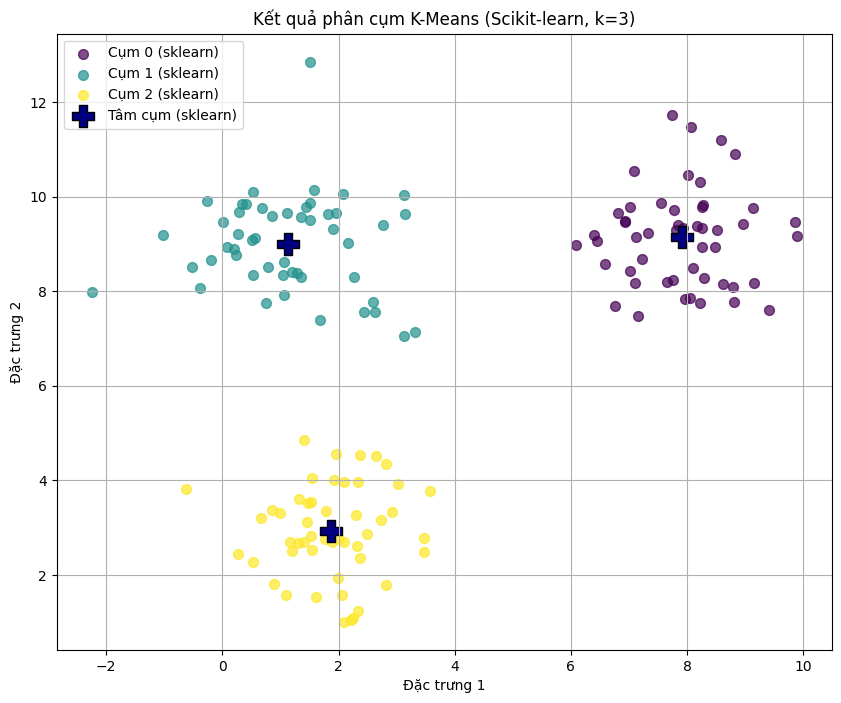

In [8]:
# Plot dữ liệu lên graph cụm 
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, k)) # Dùng lại bảng màu

# Vẽ các điểm dữ liệu theo cụm được gán bởi scikit-learn
for i in range(k):
    # Chọn các điểm dữ liệu có nhãn là 'i'
    points_in_cluster = X[labels_sklearn == i]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1],
                s=50, color=colors[i], label=f'Cụm {i} (sklearn)', alpha=0.7)

# Vẽ các tâm cụm cuối cùng tìm được bởi scikit-learn
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1],
            s=250, marker='P', color='navy', edgecolor='black', # Dùng marker khác để phân biệt
            label='Tâm cụm (sklearn)')

plt.title('Kết quả phân cụm K-Means (Scikit-learn, k=3)')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend()
plt.grid(True)
plt.show()